In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [52]:
df=pd.read_csv('daily-total-female-births.csv',header=0,index_col=0)
df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [53]:
df.head()


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [54]:
df.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [55]:
df.isnull().sum()

Births    0
dtype: int64

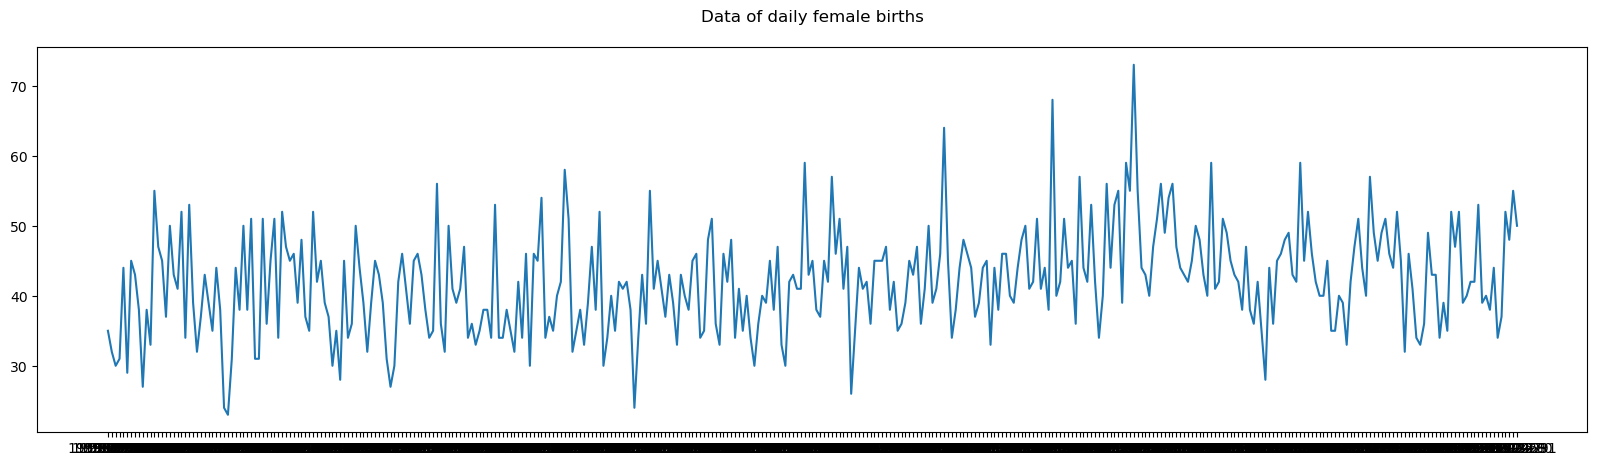

In [206]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(df)
plt.title('Data of daily female births\n')
plt.show()

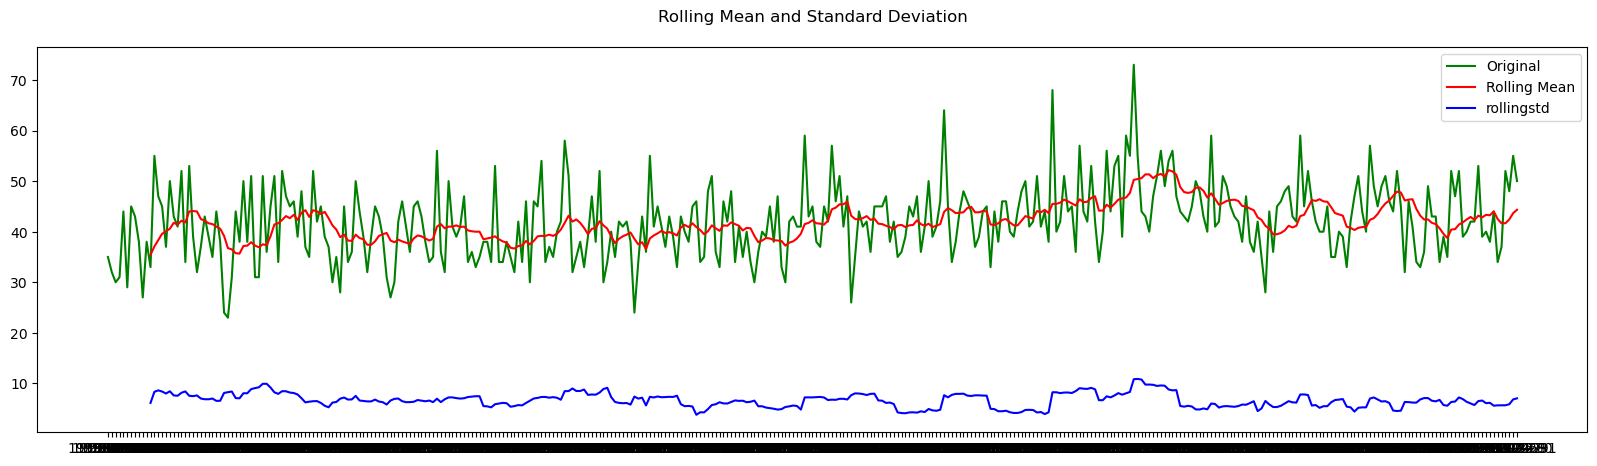

In [205]:
movingaverage=df['Births'].rolling(window=12).mean()
movingSTD=df['Births'].rolling(window=12).std()
plt.figure(figsize=(20,5))
plt.plot(df,color='green',label='Original')
plt.plot(movingaverage,color='red',label='Rolling Mean')
plt.plot(movingSTD,color='blue',label='rollingstd')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation\n')
plt.show(block=False)

<Axes: xlabel='Births', ylabel='Density'>

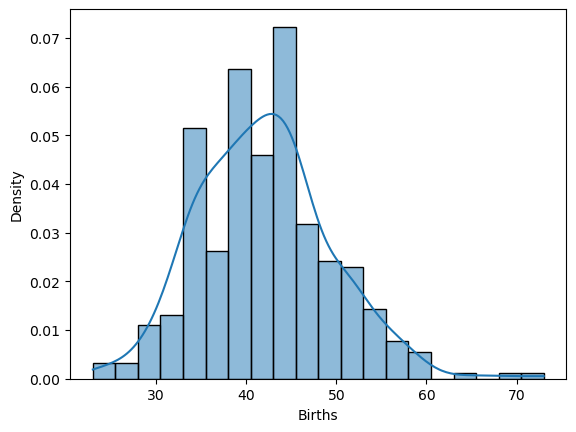

In [58]:
import seaborn as sns
sns.histplot(df['Births'],kde=True,stat='density')

<Figure size 640x480 with 0 Axes>

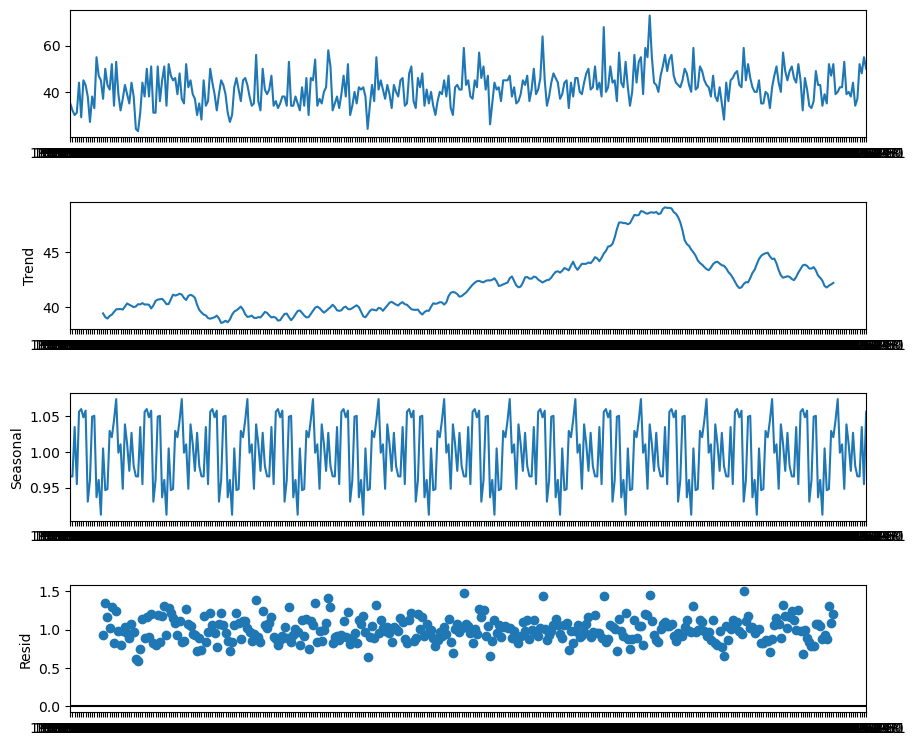

In [166]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal = seasonal_decompose(df,model='multiplicative',period=30)
fig = plt.figure()
fig = seasonal.plot()
fig.set_size_inches(10,8)

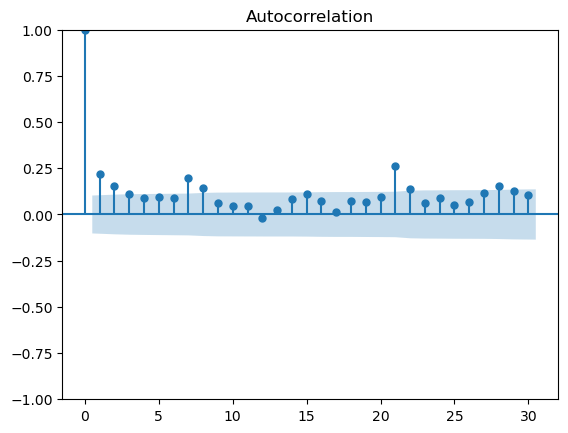

In [65]:
acf=plot_acf(df['Births'],lags=30)

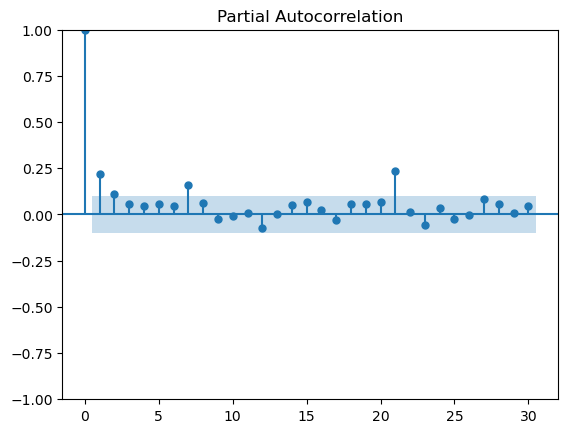

In [66]:
pacf=plot_pacf(df['Births'],lags=30)

In [70]:
result = adfuller(df)
print('ADF Statistic:%f'%result[0])
print('p-value:%f'%result[1])
print('Critical Values:'%result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic:-4.808291
p-value:0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


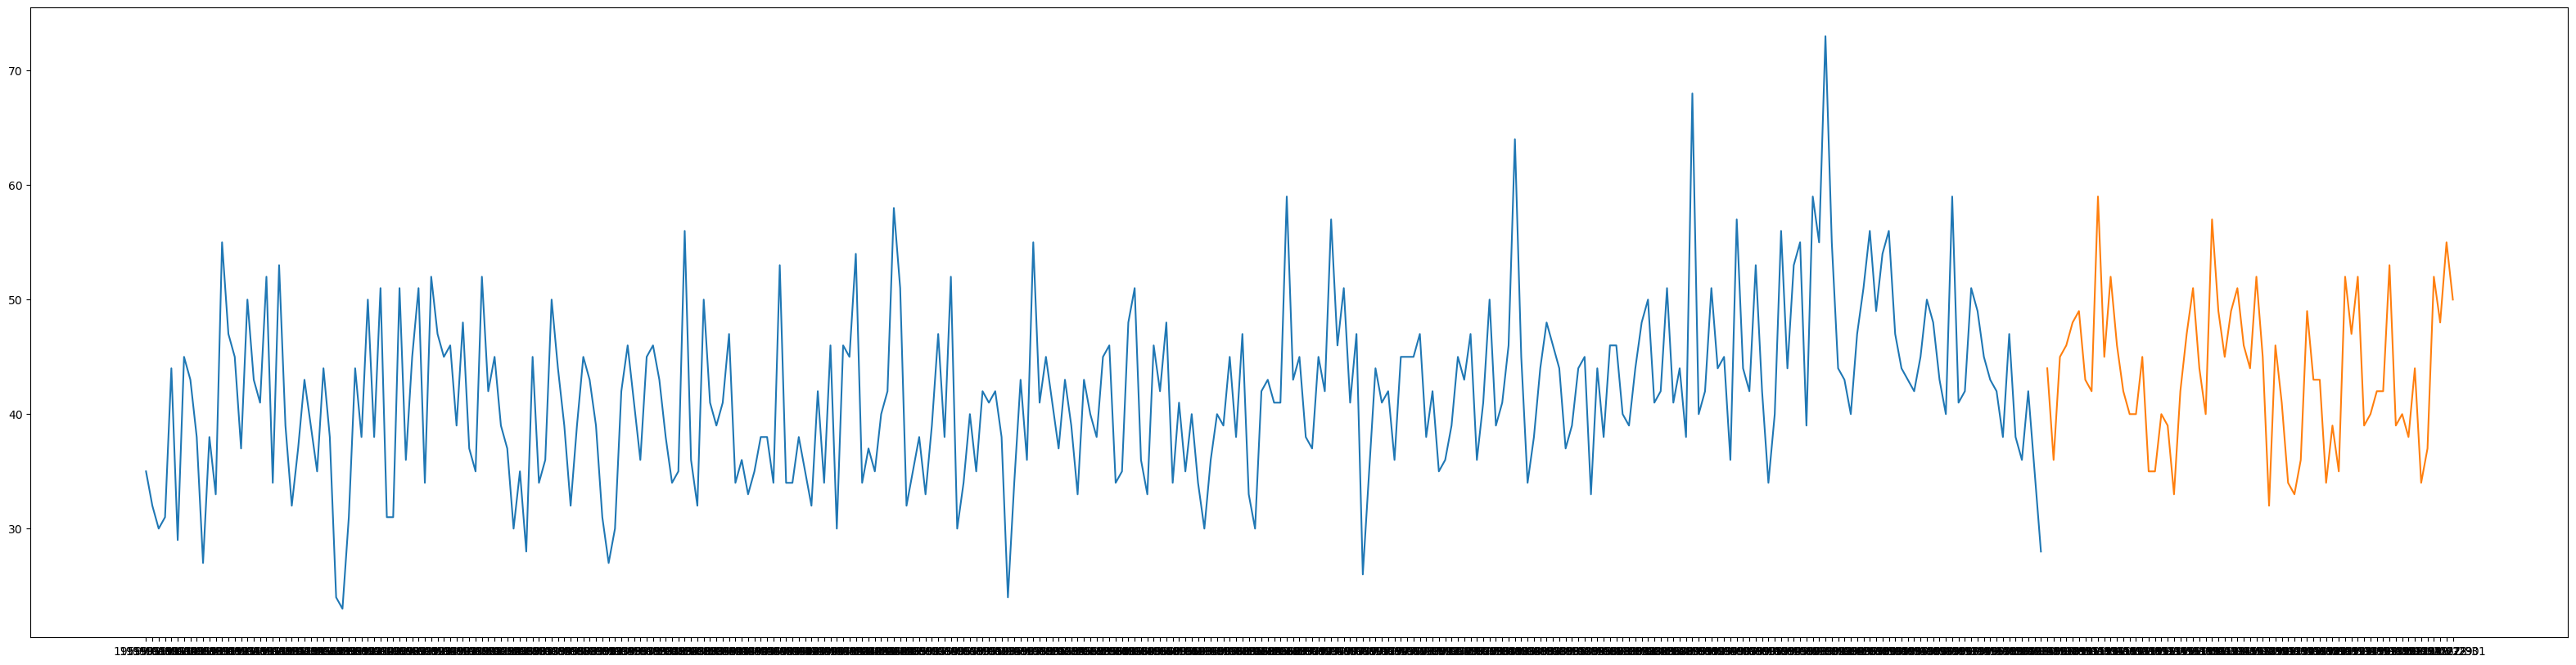

In [104]:
train=df[:300]
test=df[-65:]
plt.figure(figsize=(40,10))
plt.plot(train)
plt.plot(test)

In [105]:
train.shape

(300, 1)

In [106]:
test.shape

(65, 1)

In [108]:
#p=1,d=0,q=1

In [109]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [164]:
p=1
q=1
d=0
order=(1,0,1)
model=SARIMAX(df,order=order)
ARMA_model=model.fit()
ARMA_model.summary()

C:\Users\Smile\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Smile\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1234.248
Date:                Thu, 17 Aug 2023   AIC                           2474.496
Time:                        16:38:39   BIC                           2486.195
Sample:                    01-01-1959   HQIC                          2479.145
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   4638.434      0.000       1.000       1.000
ma.L1         -0.9478      0.018    -52.466      0.000      -0.983      -0.912
sigma2        49.8575      3.374     14.776      0.000      43.244      56.471
===================================================================================
Ljung-Box (L1) (Q):                   4.19   Jarque-Bera (JB):                19.80
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.51
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:

prediction=pd.DataFrame(ARMA_model.predict(n_periods=65),index=test.index)
prediction.columns=['predicted_births']
prediction

,predicted_births
Date,
1959-10-28,43.781123
1959-10-29,43.790795
1959-10-30,43.382918
1959-10-31,43.465495
1959-11-01,43.595896
...,...
1959-12-27,42.299110
1959-12-28,42.021185
1959-12-29,42.539719


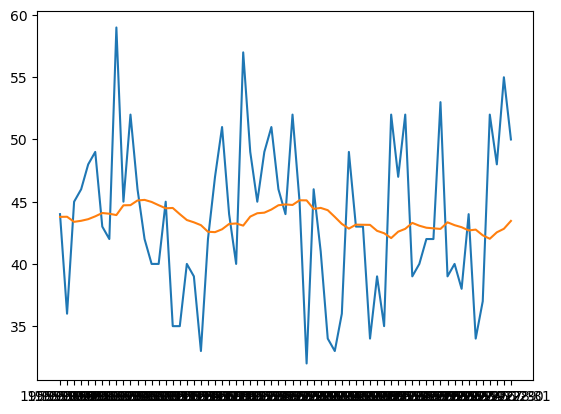

In [169]:
plt.plot(test)
plt.plot(prediction)
plt.show()

In [171]:
!pip install pmdarima

                                              0.0/566.2 kB ? eta -:--:--
     ----------                             163.8/566.2 kB 5.0 MB/s eta 0:00:01
     -------------------------------------- 566.2/566.2 kB 7.1 MB/s eta 0:00:00
                                              0.0/2.8 MB ? eta -:--:--
     -----------                              0.8/2.8 MB 24.8 MB/s eta 0:00:01
     -------------------                      1.4/2.8 MB 17.5 MB/s eta 0:00:01
     ---------------------------              1.9/2.8 MB 17.4 MB/s eta 0:00:01
     --------------------------------------   2.7/2.8 MB 17.0 MB/s eta 0:00:01
     ---------------------------------------  2.8/2.8 MB 16.0 MB/s eta 0:00:01
     ---------------------------------------  2.8/2.8 MB 16.0 MB/s eta 0:00:01
     ---------------------------------------  2.8/2.8 MB 16.0 MB/s eta 0:00:01
     ---------------------------------------- 2.8/2.8 MB 8.8 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [172]:
from pmdarima import auto_arima

In [ ]:
model=auto_arima(train)

In [183]:
model=auto_arima(train,start_p=0,d=1,start_q=0,
          D=1, start_Q=0, max_P=2,max_D=3,
          max_p=2,max_d=3,max_q=2, start_P=0,
          max_Q=2, m=30, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[30]             : AIC=2172.942, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[30]             : AIC=2014.070, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[30]             : AIC=inf, Time=1.35 sec
 ARIMA(1,1,0)(0,1,0)[30]             : AIC=2104.611, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[30]             : AIC=1995.112, Time=1.72 sec
 ARIMA(1,1,0)(2,1,1)[30]             : AIC=inf, Time=4.70 sec
 ARIMA(1,1,0)(1,1,1)[30]             : AIC=inf, Time=1.61 sec
 ARIMA(0,1,0)(2,1,0)[30]             : AIC=2054.040, Time=1.08 sec
 ARIMA(2,1,0)(2,1,0)[30]             : AIC=1977.480, Time=2.06 sec
 ARIMA(2,1,0)(1,1,0)[30]             : AIC=2001.449, Time=0.96 sec
 ARIMA(2,1,0)(2,1,1)[30]             : AIC=inf, Time=15.33 sec
 ARIMA(2,1,0)(1,1,1)[30]             : AIC=inf, Time=3.02 sec
 ARIMA(2,1,1)(2,1,0)[30]             : AIC=1916.817, Time=7.60 sec
 ARIMA(2,1,1)(1,1,0)[30]             : AIC=1934.340, Time=3.33 sec
 ARIMA(2,1,1)(2,1,1)[30]             : AIC=

In [184]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  300
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 30)   Log Likelihood                -952.502
Date:                             Thu, 17 Aug 2023   AIC                           1915.005
Time:                                     17:38:18   BIC                           1932.978
Sample:                                 01-01-1959   HQIC                          1922.223
                                      - 10-27-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1156      0.066      1.751      0.080      -0.014       0.245
ma.L1         -0.9741      0.020    -49.393      0.000      -1.013      -0.935
ar.S.L30      -0.6904      0.064    -10.829      0.000      -0.815      -0.565
ar.S.L60      -0.3180      0.070     -4.521      0.000      -0.456      -0.180
sigma2        64.8308      4.986     13.003      0.000      55.059      74.603
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.15
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.42
Prob(H) (two-sided):                  0.98   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [186]:
prediction = pd.DataFrame(model.predict(n_periods = 65),index=test.index)
prediction.columns = ['predicted_Births']
prediction

,predicted_Births
Date,
1959-10-28,44.793145
1959-10-29,45.605574
1959-10-30,51.330217
1959-10-31,43.453488
1959-11-01,56.812028
...,...
1959-12-27,48.629621
1959-12-28,49.758655
1959-12-29,54.901065


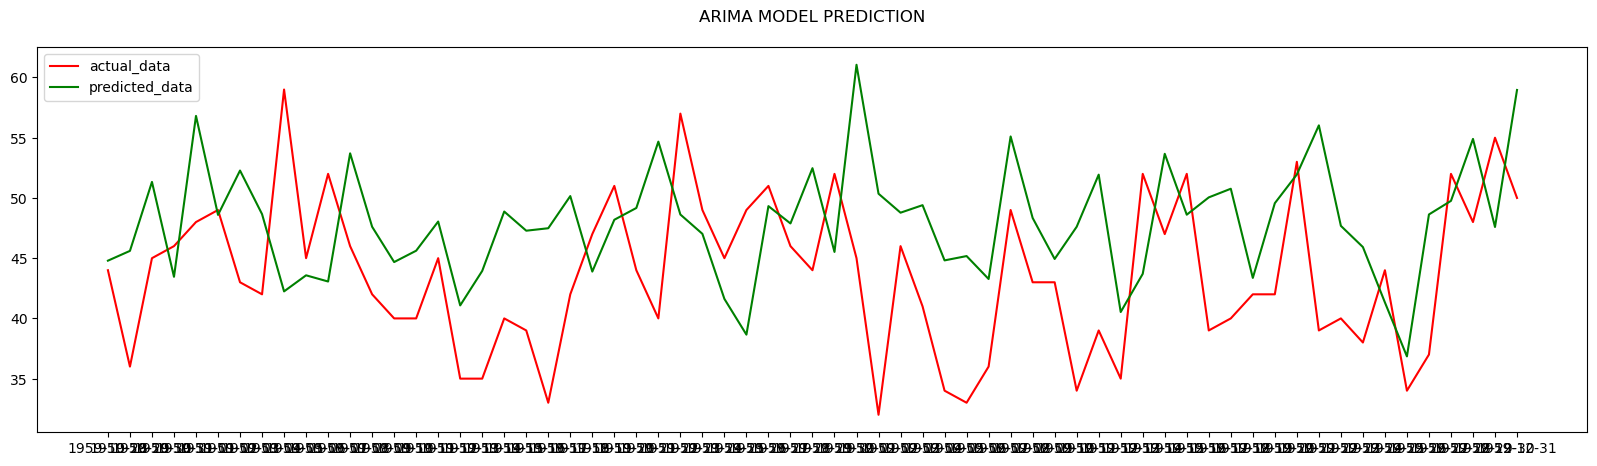

In [195]:
plt.figure(figsize=(20,5))
plt.plot(test,color='red',label='actual_data')
plt.plot(prediction,color='green',label='predicted_data')
plt.legend(loc='best')
plt.title('ARIMA MODEL PREDICTION\n')
plt.show()